# README
This notebook is used to plot the error distribution of Pretrained Battery Transformer (PBT).

In [13]:
import os
import sys
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
from utils.tools import domain_average
import torch
import json
import numpy as np
import matplotlib.pyplot as plt
from data_provider.data_split_recorder import split_recorder

In [14]:
def set_ax_linewidth(ax, bw=1.5):
    ax.spines['bottom'].set_linewidth(bw)
    ax.spines['left'].set_linewidth(bw)
    ax.spines['top'].set_linewidth(bw)
    ax.spines['right'].set_linewidth(bw)

def set_ax_font_size(ax, fontsize=10):
    ax.tick_params(axis='y',
                 labelsize=fontsize # y轴字体大小设置
                  ) 
    ax.tick_params(axis='x',
                 labelsize=fontsize # x轴字体大小设置
                  ) 

def set_draft(the_plt, other_ax=''):
    ax = the_plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.xlabel('')
    plt.ylabel('')
    if other_ax:
        other_ax.axes.xaxis.set_ticklabels([])
        other_ax.axes.yaxis.set_ticklabels([])
        other_ax.set_ylabel('')
        other_ax.set_xlabel('')

def set_draft_fig(fig):
    for ax in fig.axes:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        ax.set_ylabel('')
        ax.set_xlabel('')

In [15]:
test_seed_42_res_path = '../results/PBT_MIX_large_42.json'
test_seed_2021_res_path = '../results/PBT_MIX_large_2021.json'
test_seed_2024_res_path = '../results/PBT_MIX_large_2024.json'
# seed_42_res_path = '../results/CPMLP_MIX_large_42.json'
# seed_2021_res_path = '../results/CPMLP_MIX_eval_large.json'
# seed_2024_res_path = '../results/CPMLP_MIX_eval_large.json'

test_seed_42_res = json.load(open(test_seed_42_res_path))
test_seed_2021_res = json.load(open(test_seed_2021_res_path))
test_seed_2024_res = json.load(open(test_seed_2024_res_path))

# seed_42_res_path = '../results/CPMLP_MIX_eval_42.json'
# seed_2021_res_path = '../results/CPMLP_MIX_eval_2021.json'
# seed_2024_res_path = '../results/CPMLP_MIX_eval_2024.json'
seed_42_res_path = '../results/PBT_MIX_eval_42.json'
seed_2021_res_path = '../results/PBT_MIX_eval_2021.json'
seed_2024_res_path = '../results/PBT_MIX_eval_2024.json'

seed_42_res = json.load(open(seed_42_res_path))
seed_2021_res = json.load(open(seed_2021_res_path))
seed_2024_res = json.load(open(seed_2024_res_path))

test_unique_ids_42, test_res_42 = domain_average(torch.tensor(test_seed_42_res['MIX_large']['domain_ids']), torch.tensor(test_seed_42_res['MIX_large']['mapes']), True)
test_unique_ids_2021, test_res_2021 = domain_average(torch.tensor(test_seed_2021_res['MIX_large']['domain_ids']), torch.tensor(test_seed_2021_res['MIX_large']['mapes']), True)
test_unique_ids_2024, test_res_2024 = domain_average(torch.tensor(test_seed_2024_res['MIX_large']['domain_ids']), torch.tensor(test_seed_2024_res['MIX_large']['mapes']), True)

unique_ids_42, res_42 = domain_average(torch.tensor(seed_42_res['MIX_eval']['domain_ids']), torch.tensor(seed_42_res['MIX_eval']['mapes']), True)
unique_ids_2021, res_2021 = domain_average(torch.tensor(seed_2021_res['MIX_eval']['domain_ids']), torch.tensor(seed_2021_res['MIX_eval']['mapes']), True)
unique_ids_2024, res_2024 = domain_average(torch.tensor(seed_2024_res['MIX_eval']['domain_ids']), torch.tensor(seed_2024_res['MIX_eval']['mapes']), True)

In [16]:
test_id_mapes = {}
eval_id_mapes = {}
for id in test_unique_ids_42:
    test_id_mapes[id] = np.mean([test_res_42[test_unique_ids_42==id][0], test_res_2021[test_unique_ids_2021==id][0], test_res_2024[test_unique_ids_2024==id][0]])

for id in unique_ids_42:
    eval_id_mapes[id] = np.mean([res_42[unique_ids_42==id][0], res_2021[unique_ids_2021==id][0], res_2024[unique_ids_2024==id][0]])

for id, mape in eval_id_mapes.items():
    if mape > 1:
        print(id)
print(test_id_mapes)

339.0
371.0
{3.0: 0.42039526, 4.0: 0.08453035, 6.0: 0.046093095, 7.0: 0.05772378, 8.0: 0.07309877, 10.0: 0.044624638, 11.0: 0.14679605, 14.0: 0.08643945, 16.0: 0.2670362, 17.0: 0.16682939, 29.0: 0.15799363, 31.0: 0.12570208, 35.0: 0.03062304, 36.0: 0.043835133, 37.0: 0.0652726, 39.0: 0.051937353, 48.0: 0.031708192, 55.0: 0.014690393, 58.0: 0.07497249, 60.0: 0.014866465, 75.0: 0.10981438, 76.0: 0.027549585, 80.0: 0.04424138, 81.0: 0.03515474, 82.0: 0.085687615, 85.0: 0.03819363, 89.0: 0.009172111, 90.0: 0.03279664, 91.0: 0.3024443, 93.0: 0.087705135, 95.0: 0.16627456, 96.0: 0.18485291, 100.0: 0.51663804, 105.0: 0.3211553, 106.0: 0.10295629, 108.0: 0.12836076, 120.0: 0.08309646, 121.0: 0.042303126, 122.0: 0.119764775, 123.0: 0.045935974, 124.0: 0.10663774, 125.0: 0.13273133, 126.0: 0.18097676, 129.0: 0.28318572, 130.0: 0.28743967, 131.0: 0.14119504, 132.0: 0.026435325, 133.0: 0.051371157, 135.0: 0.024591992, 136.0: 0.120876335, 139.0: 0.15875413, 141.0: 0.057278972, 142.0: 0.07234258, 14

In [17]:
%matplotlib inline

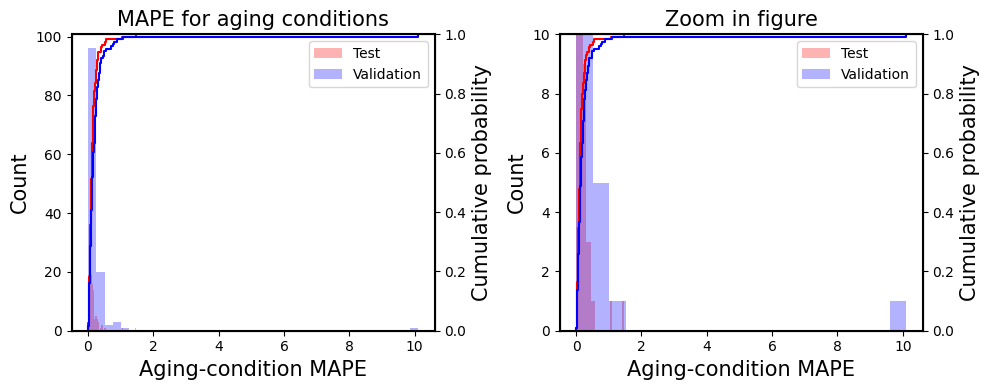

In [19]:
plt_mapes = list(test_id_mapes.values())
eval_plt_mapes = list(eval_id_mapes.values())
# plt_mapes = [i for i in plt_mapes if i <=0.4]
fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(plt_mapes, bins=40, color='red', alpha=0.3, label='Test')
plt.hist(eval_plt_mapes, bins=40, color='blue', alpha=0.3, label='Validation')
plt.legend()
plt.ylabel('Count', fontsize=15)
plt.xlabel('Aging-condition MAPE', fontsize=15)
plt.title('MAPE for aging conditions', fontsize=15)
ax = plt.gca().twinx()
ax.ecdf(plt_mapes, color='red')
ax.ecdf(eval_plt_mapes, color='blue')
set_ax_linewidth(plt.gca())
ax.set_ylabel('Cumulative probability', fontsize=15)
# plt.xlim(0,0.4)
plt.subplot(1,2,2)
plt.hist(plt_mapes, bins=20, color='red', alpha=0.3, label='Test')
plt.hist(eval_plt_mapes, bins=20, color='blue', alpha=0.3, label='Validation')
plt.legend()
plt.ylabel('Count', fontsize=15)
plt.xlabel('Aging-condition MAPE', fontsize=15)
plt.ylim(0,10)
plt.title('Zoom in figure', fontsize=15)
ax = plt.gca().twinx()
ax.ecdf(plt_mapes, color='red')
ax.ecdf(eval_plt_mapes, color='blue')
set_ax_linewidth(plt.gca())
ax.set_ylabel('Cumulative probability', fontsize=15)
fig.tight_layout()
plt.savefig('../figures/aging_condition_mape.jpg', dpi=600)
plt.show()
